# Notebook for reproducing SI figure of stencil thickening

In [3]:
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps
from tqdm.auto import tqdm

from mbhl import *

In [4]:
%mkdir -p subfigs-SI-thickening-stencil

In [5]:
def plot_pattern_square(
    ax,
    delta=50 * nm,
    phi=5,
    theta=30,
    R=300 * nm,
    n_pts=360,
    r=50 * nm,
    Lr_ratio=4,
    lim=(0, 1 * um, 0, 1 * um),
    method="fft",
):
    phi = np.deg2rad(phi)
    gap = R / np.tan(phi) - delta
    print(f"phi {np.degrees(phi)}, gap {gap}")
    if gap < 0:
        raise ValueError("Cannot simulate system with negative gap!")
    Rm = np.tan(phi) * delta
    rm_ratio = Rm / (2 * r)
    print("Rm ratio, ", rm_ratio)
    theta = np.deg2rad(theta)
    L = r * Lr_ratio
    eps = delta * np.tan(phi) / (2 * r)
    print(f"Eps is {eps}")
    # print(f"Shift is {R / um} um")
    geom = square_hole_lattice(r, L)
    stencil = Stencil(geom, thickness=delta, gap=gap, h=L / 128)
    phys = Physics(n_beam_trajectory(phi, theta_0=theta, n_pts=n_pts))
    system = System(stencil, phys)
    system.simulate(method=method, fold_to_bz=False)
    if ax is not None:
        ax.set_axis_off()
        ax, cm = system.draw(
            ax=ax,
            cmap="viridis",
            domain=lim,
            show_mask=True,
        )
    return system, ax, cm

5
phi 5.0, gap 2.236010460552269
Rm ratio,  0.04374433176296199
Eps is 0.04374433176296199
5
phi 5.0, gap 2.1860104605522688
Rm ratio,  0.08748866352592398
Eps is 0.08748866352592398
5
phi 5.0, gap 2.136010460552269
Rm ratio,  0.131232995288886
Eps is 0.131232995288886


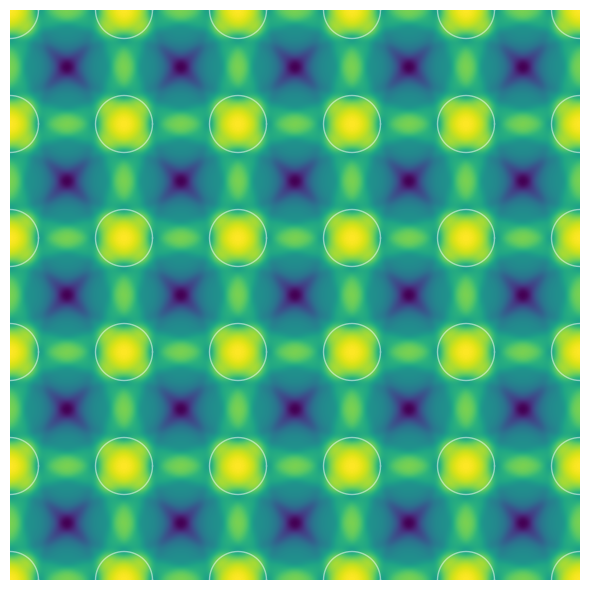

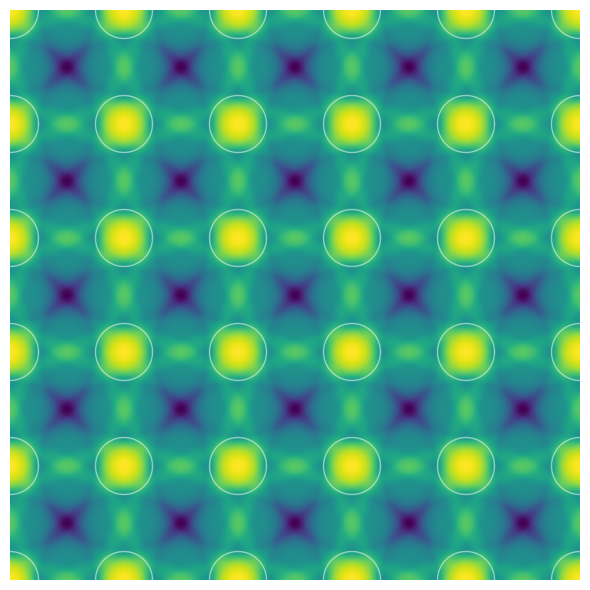

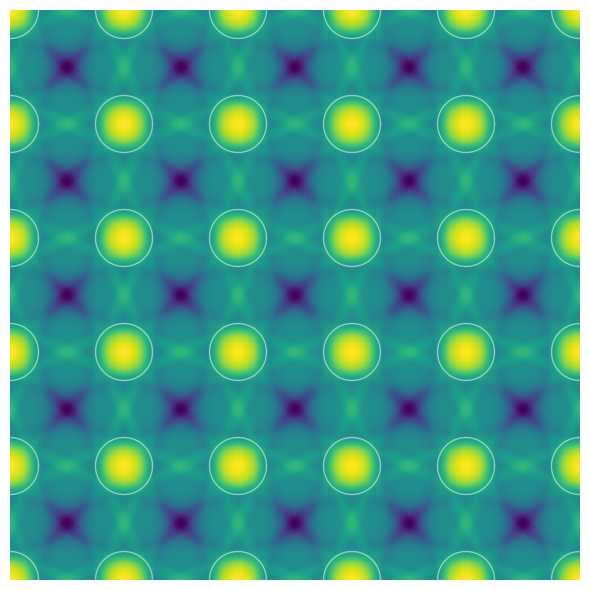

In [6]:
n_pts = 1000
phi = 5
delta = 50 * nm
for d_delta in np.array([0, 50, 100]) * nm:
    fig, ax = plt.subplots(figsize=(6, 6))
    phi = phi
    print(phi)
    domain = (0, 1 * um, 0, 1 * um)
    system, *_ = plot_pattern_square(
        ax,
        phi=phi,
        delta=delta + d_delta,
        r=50 * nm,
        R=200 * nm,
        method="raytracing",
        lim=domain,
        n_pts=n_pts,
    )
    fig.tight_layout()
    fig.savefig(
        Path("subfigs-SI-thickening-stencil")
        / f"MBHL-D-delta-{d_delta / nm}.svg"
    )

In [84]:
res1 = system.results.array / system.results.array.max()
res2 = system2.results.array / system2.results.array.max()
np.mean(np.abs(res1 - res2) / (res1 + 1.0e-8))

0.2343325555824076

In [90]:
(res1 - res2).max()

0.1758979067192073

In [69]:
system.results.array

array([[ 92.82950645,  94.8178903 ,  99.91508124, ...,  99.91508124,
         94.8178903 ,  92.82950645],
       [ 91.98234778,  94.99734763, 100.81750866, ..., 100.81750866,
         94.99734763,  91.98234778],
       [ 91.31661254,  95.3347884 , 101.80838185, ..., 101.80838185,
         95.3347884 ,  91.31661254],
       ...,
       [ 93.07656802,  95.39743468,  99.64268773, ...,  99.64268773,
         95.39743468,  93.07656802],
       [ 92.52773536,  94.24230582,  98.44272307, ...,  98.44272307,
         94.24230582,  92.52773536],
       [ 92.78717336,  94.32130024,  98.83615112, ...,  98.83615112,
         94.32130024,  92.78717336]])

In [7]:
200 / 11.156 * 0.702

12.585155969881676

In [9]:
200 / 11.156 * 2.096

37.57619218357834

In [10]:
200 / 11.156 * 3.595

64.44962352097527